### Data Transformation: Function Application for Feature Engineering

This section discusses how to apply mathematical transformations to features in a dataset to improve their distribution, reduce skewness, or enhance model performance.

#### Steps:

1. **Identify Target Feature**:  
   Choose the feature(s) that require transformation based on their distribution or characteristics, such as skewed data or large ranges.

2. **Apply Mathematical Transformations**:  
   Use appropriate mathematical functions for transformation:
   - **Log Transformation**:  
     Reduces the impact of large values and helps normalize skewed distributions. For a feature \( x \), the transformation is:
     $$ x' = \log(x + 1) $$
     Adding 1 ensures non-negative input to the logarithmic function.
   - **Square Root Transformation**:  
     Reduces skewness while retaining the original data's scale:
     $$ x' = \sqrt{x} $$
   - **Reciprocal Transformation**:  
     Inverts the feature values, emphasizing smaller values:
     $$ x' = \frac{1}{x + 1} $$
     Adding 1 prevents division by zero.

3. **Modify Dataset**:  
   Apply the transformation to the target column and store the result in a new column, keeping the original feature intact for comparison.

4. **Analyze Results**:  
   Use visualization techniques, such as histograms or box plots, to compare the original and transformed distributions and verify the effectiveness of the transformation.


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
loan_data = pd.read_csv('loan.csv')
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Lets work on `loan['CoapplicantIncome']`

In [70]:
loan_data['CoapplicantIncome'].isnull().sum()

0

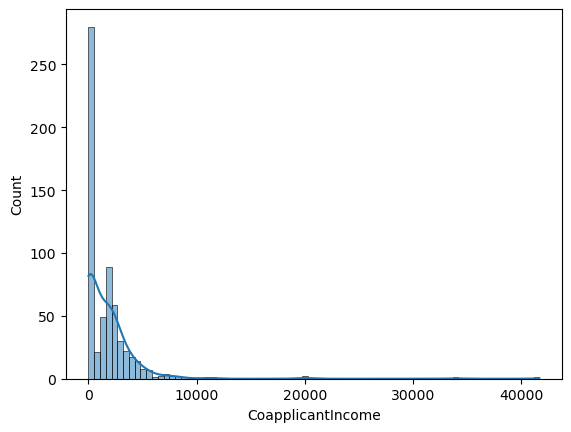

In [71]:
sns.histplot(loan_data['CoapplicantIncome'], kde=True)
plt.show()

#### Now lets use function transformation

### Data Transformation Using Logarithmic and Power Transformations

This section demonstrates the use of logarithmic and power transformations to adjust the distribution of data, specifically focusing on improving data symmetry and reducing skewness.

#### Transformation Techniques:

1. **Logarithmic Transformation**:  
   - **Concept**: Reduces the influence of large values by compressing the range of the data.  
   - **Formula**:  
     $ x' = \log(x + 1) $  
     Adding 1 ensures no negative or undefined values.  
   - **Usage**: Applied to skewed distributions with large outliers, it helps normalize the data.

   **Example**:  
   In the dataset, the `CoapplicantIncome` feature is transformed using the logarithmic function, and the results are compared using distribution plots. After the transformation, the distribution becomes more symmetric.

2. **Power Transformation ($x^2$)**:  
   - **Concept**: Amplifies the differences between smaller values while smoothing the distribution for larger values.  
   - **Formula**:  
     $ x' = x^2 $  
   - **Usage**: Useful when the data has a moderate range and needs better spread or scaling. 

   **Example**:  
   The `CoapplicantIncome` feature is transformed using the power function $x^2$. When compared to the logarithmic transformation, the squared transformation often produces a better spread of data values, enhancing the feature's usability for machine learning models.

#### Visualization and Comparison:

- **Before Transformation**: Displays the original distribution, often skewed or uneven.  
- **After Transformation**: Shows the transformed distribution with improved symmetry and reduced skewness.

Both techniques serve to improve the statistical properties of the data, with the choice depending on the specific characteristics of the dataset.


In [72]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [73]:
ft = FunctionTransformer(func=np.log1p)
loan_data['CoapplicantIncome_transformed'] = ft.fit_transform(loan_data[['CoapplicantIncome']])

In [74]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_transformed
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000


C:\Users\Durjay\AppData\Local\Temp\ipykernel_5364\3529045832.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['CoapplicantIncome'], kde=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_5364\3529045832.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['CoapplicantIncome

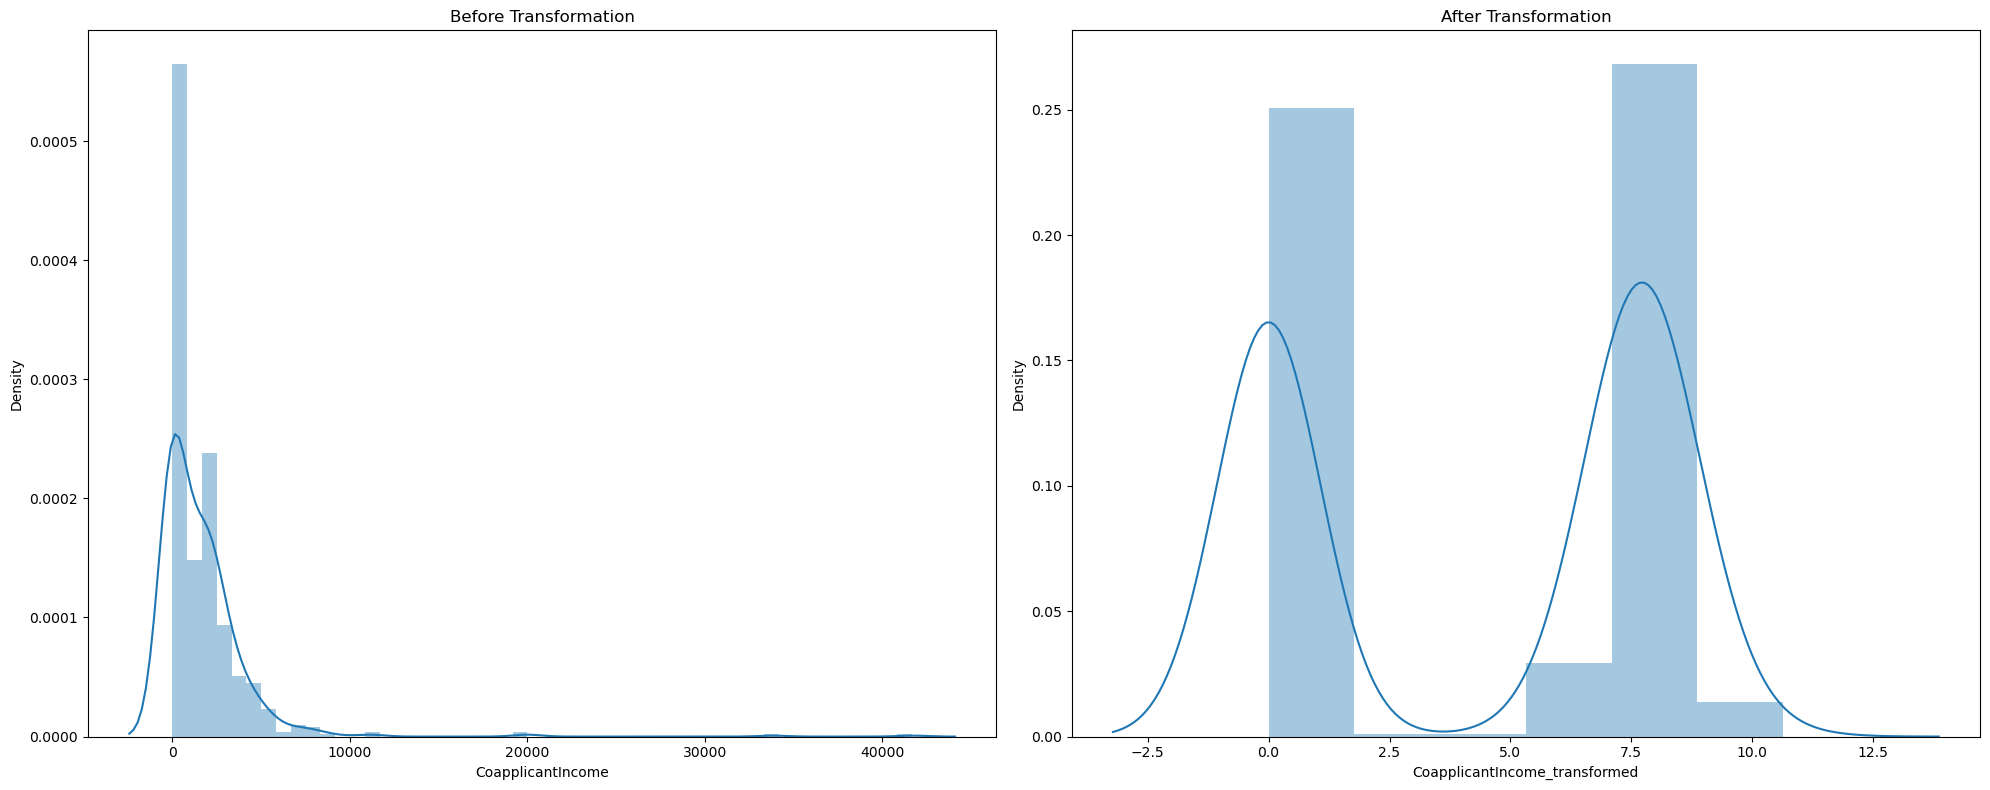

In [75]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Before Transformation')
sns.distplot(loan_data['CoapplicantIncome'], kde=True)

plt.subplot(1,2,2)
plt.title('After Transformation')
sns.distplot(loan_data['CoapplicantIncome_transformed'], kde=True)

plt.tight_layout()
plt.show()

C:\Users\Durjay\AppData\Local\Temp\ipykernel_5364\3510002084.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['CoapplicantIncome'], kde=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_5364\3510002084.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['CoapplicantIncom

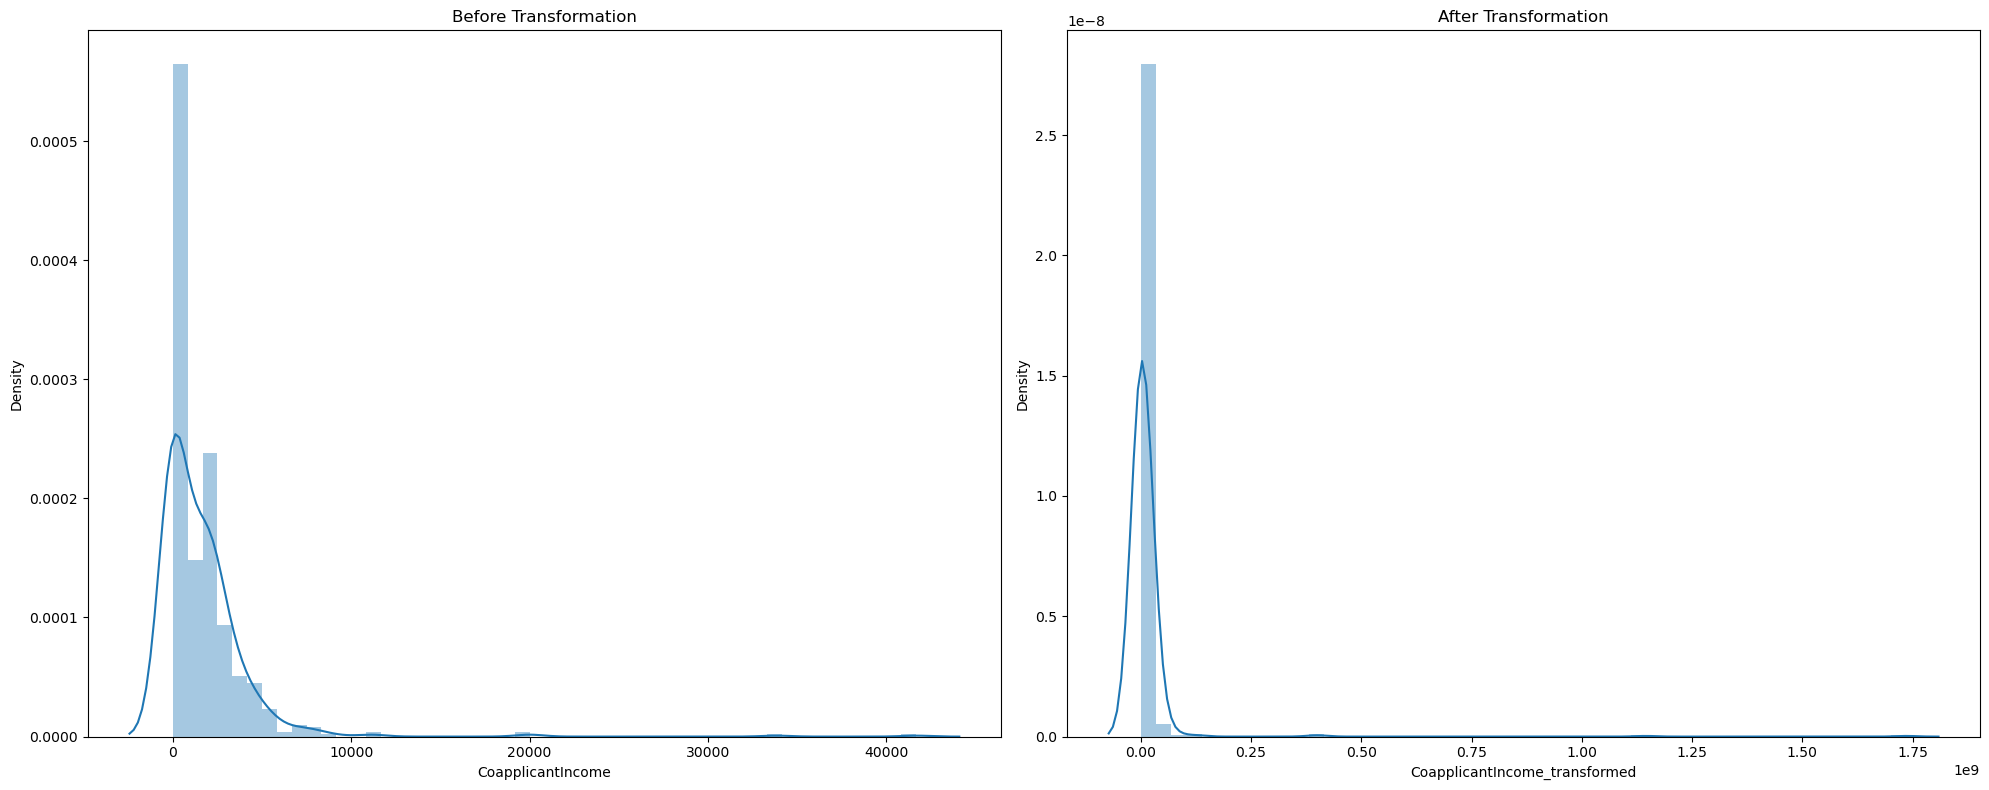

In [76]:
ft1 = FunctionTransformer(func=lambda x: x**2)
loan_data['CoapplicantIncome_transformed'] = ft1.fit_transform(loan_data[['CoapplicantIncome']])

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Before Transformation')
sns.distplot(loan_data['CoapplicantIncome'], kde=True)

plt.subplot(1,2,2)
plt.title('After Transformation')
sns.distplot(loan_data['CoapplicantIncome_transformed'], kde=True)

plt.tight_layout()
plt.show()

**Note :** $x^2$ is more accurate than log